<a href="https://colab.research.google.com/github/beifa/ML-models/blob/master/Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import pandas as pd 
from scipy import optimize
from sklearn.datasets import load_wine
from IPython.display import Image
import warnings
warnings.filterwarnings('ignore')

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
img1 = '/content/drive/My Drive/for_GitHub/NN_pattern.jpg'
img2 = '/content/drive/My Drive/for_GitHub/Example_work.jpg'
img3 = '/content/drive/My Drive/for_GitHub/backpropagationAlg.jpg'

In [0]:
# img1 = '/image/NN_pattern.jpg'
# img2 = '/image/Example_work.jpg'
# img3 = '/image/backpropagationAlg.jpg'

In [0]:
data = load_wine()
X = data.data
y = data.target
X.shape

(178, 13)

In [0]:
input_layer = 13
hidden_layer = 6
out_layer = 3

### Sigmoid

In [0]:
def sigmoid(z):
  return (1 / (1 + np.exp(-z)))

#### Init Weight

Инициализация всех тета-весов до нуля не работает с нейронными сетями. При обратном распространении все узлы будут неоднократно обновляться до одного и того же значения.

In [0]:
"""
first we need to take weights somewhere, we generate them randomly and small
"""
def randInitWeights(L_in, L_out):
    """
    Randomly initialize the weights of a layer in a neural network.    
    Param:
    ------
    L_in : Number of incomming connections.    
    L_out : Number of outgoing connections.      
    Returns
    -------
    W : weight random values.
        matrix of size(L_out, 1 + L_in) as first column "bias"    
    """
    W = np.zeros((L_out, 1 + L_in))    
    epsilon_init = np.sqrt(6) / np.sqrt(L_in + L_out)
    W = np.random.rand(L_out, 1 + L_in) * 2 * epsilon_init - epsilon_init  
    return W

In [0]:
print('Initializing Neural Network Parameters ...')
"""
intercept + 1
      178 + 1, 12 + 1
"""
theta1 = randInitWeights(input_layer, hidden_layer) #6 * 14
theta2 = randInitWeights(hidden_layer, out_layer)   #3 * 7

all_theta = np.concatenate((theta1.ravel(), theta2.ravel())) # combine for optimize

print('Encode the labels as vectors (y) ...')
y_dummies = pd.get_dummies(y).values                #178 * 3

Initializing Neural Network Parameters ...
Encode the labels as vectors (y) ...


In [0]:
theta1.shape, theta2.shape

((6, 14), (3, 7))

In [0]:
input_layer = 13
hidden_layer = 6
out_layer = 3

t1 = all_theta[:84].reshape(6, 14)
t2 = all_theta[84:].reshape(3, 7)

#### Sigmoid Gradient

The gradient for the sigmoid function can be  computed as

$$ g'(z) = \frac{d}{dz} g(z) = g(z)\left(1-g(z)\right) $$

where

$$ \text{sigmoid}(z) = g(z) = \frac{1}{1 + e^{-z}} $$


In [0]:
def sigmoidGradient(z):
  g = np.zeros(z.shape)
  g = sigmoid(z) * (1 - sigmoid(z))
  return g

### Cost

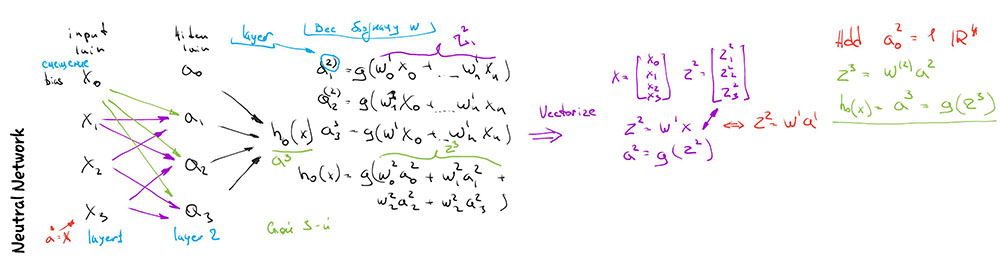

In [0]:
Image(filename=img1)

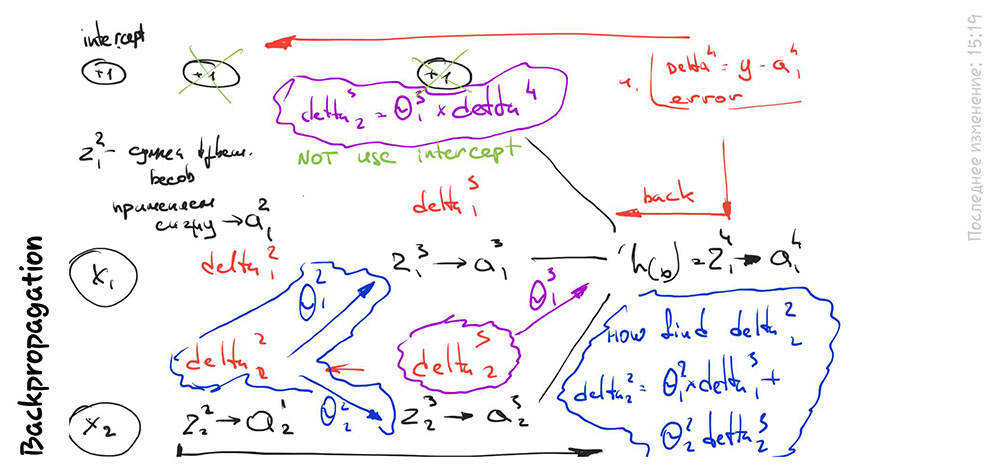

In [0]:
##Backpropagation
Image(filename=img3)

In [0]:
#input layers
#add intercept
def cost(all_theta, input_layer, hidden_layer, out_layer, X, y_dummies, lambda_):  
  m, n = X.shape
  
  #return theta
  theta1 = all_theta[:(input_layer + 1) * hidden_layer].reshape(hidden_layer, input_layer + 1)
  theta2 = all_theta[(input_layer + 1) * hidden_layer:].reshape(out_layer, hidden_layer + 1)

  #Start
  a1 = np.c_[np.ones(X.shape[0]), X] #178 * 14
  z1 =np.dot(a1, theta1.T) #178 * 6
  a2 = sigmoid(z1)
  a2 = np.c_[np.ones(X.shape[0]), a2] #178 * 7
  z3 = np.dot(a2, theta2.T) #178 * 3
  a3 = sigmoid(z3) #h(x)
  #End 
  
  #cost
  J = 1/ m * np.sum(-(y_dummies * (np.log(a3))) - (1 - y_dummies) * (np.log(1 - a3)))
  
  #add reg
  J = J + lambda_/(2 * m) *(np.sum(np.square(theta1[:, 1:])) + np.sum(np.square(theta2[:, 1:])))

  #Backpropagation
  d3 = (a3 -y_dummies) # 178 * 3
  z2 = np.hstack((np.ones((m, 1)), z1)) #178 * 7
  d2 = d3.dot(theta2) * sigmoidGradient(z2) #178 * 7
  d2 = d2[:, 1:] #178 * 6  
  D2 = d3.T.dot(a2) #(178, 3) (178, 7) => (3, 7)
  D1 = d2.T.dot(a1) #(178, 6) (178, 14) => (6, 14)  
  #grad
  D1 =1* D1 / m
  D2 =1* D2 / m
  #add reg
  D1[:, 1:] = D1[:, 1:] + lambda_/m * theta1[:, 1:]
  D2[:, 1:] = D2[:, 1:] + lambda_/m * theta2[:, 1:] 
  grad = np.hstack((D1.ravel(), D2.ravel()))
  return J, grad
  

lambda_ = 1
J, grad = cost(all_theta, input_layer, hidden_layer, out_layer, X, y_dummies, lambda_)

### Predict

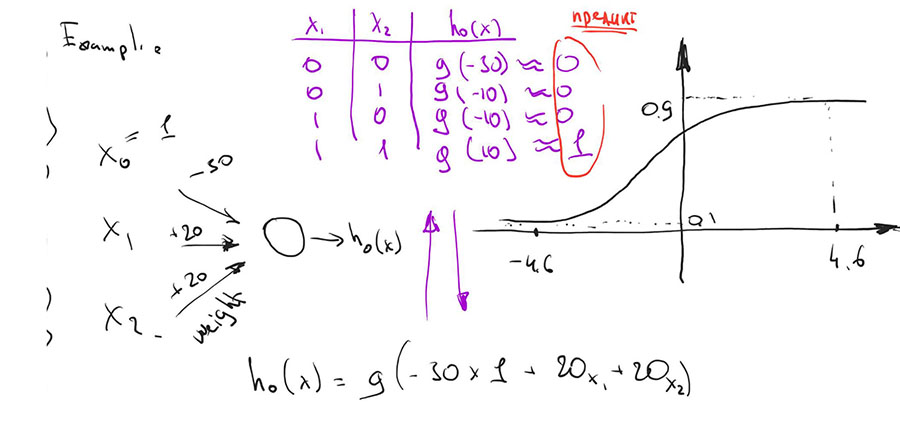

In [0]:
Image(filename=img2)

In [0]:
def predict(Theta1, Theta2, X):
    """
    We calculated theta and first substitute in the first layer, then in the second we get the hypothesis of our calculations

    theta1, 2: array, theta after backprop    
    """    
    m = X.shape[0]
    num_labels = Theta2.shape[0]    
    p = np.zeros(m)
    a2 = sigmoid(np.dot(np.concatenate([np.ones((m, 1)), X], axis=1), Theta1.T))
    a3 = sigmoid(np.dot(np.concatenate([np.ones((m, 1)), a2], axis=1), Theta2.T))
    p = np.argmax(a3, axis=1)
    return p

In [0]:
#check without minimize

theta1 = grad[:(input_layer + 1) * hidden_layer].reshape(hidden_layer, input_layer + 1)
theta2 = grad[(input_layer + 1) * hidden_layer:].reshape(out_layer, hidden_layer + 1)

pred = predict(theta1, theta2, X)
print('Training Set Accuracy: %f' % (np.mean(pred == y) * 100))

Training Set Accuracy: 26.966292


### Add minimize func

In [0]:
def minimize(theta, input_layer, hidden_layer, out_layer, X, y_dummies, lambda_, method = 'TNC'):
  initial_theta = theta
  options= {'maxiter': 100}
  costfunc = lambda p: cost(p, input_layer, hidden_layer, out_layer, X, y_dummies, lambda_)
  res = optimize.minimize(costFunction, initial_theta, jac=True, method= method, options=options)
  return res.x

lambda_ = .01
params = minimize(grad, input_layer, hidden_layer, out_layer, X, y_dummies, lambda_, method = 'TNC')
Theta1 = params[:(input_layer + 1) * hidden_layer].reshape(hidden_layer, input_layer + 1)
Theta2 = params[(input_layer + 1) * hidden_layer:].reshape(out_layer, hidden_layer + 1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


In [0]:
pred = predict(Theta1, Theta2, X)
print('Training Set Accuracy: %f' % (np.mean(pred == y) * 100))

Training Set Accuracy: 68.539326


### Test

In [0]:
method_list = ['Nelder-Mead',
          'Powell',
          'CG',
          'BFGS',
          'Newton-CG',
          'L-BFGS-B',
          'TNC',
          'COBYLA',
          'SLSQP']

lambda_ = 1
print('Find best method.....')
for method in method_list:
  params = minimize(grad, input_layer, hidden_layer, out_layer, X, y_dummies, lambda_, method = method)
  Theta1 = params[:(input_layer + 1) * hidden_layer].reshape(hidden_layer, input_layer + 1)
  Theta2 = params[(input_layer + 1) * hidden_layer:].reshape(out_layer, hidden_layer + 1)
  pred = predict(Theta1, Theta2, X)
  print("Method name :", method )
  print('Training Set Accuracy: %f' % (np.mean(pred == y) * 100))
  print('_________________________')



Find best method.....
Method name : Nelder-Mead
Training Set Accuracy: 26.966292
_________________________
Method name : Powell
Training Set Accuracy: 99.438202
_________________________
Method name : CG
Training Set Accuracy: 67.415730
_________________________
Method name : BFGS
Training Set Accuracy: 98.876404
_________________________
Method name : Newton-CG
Training Set Accuracy: 39.887640
_________________________
Method name : L-BFGS-B
Training Set Accuracy: 43.258427
_________________________
Method name : TNC
Training Set Accuracy: 70.224719
_________________________
Method name : COBYLA
Training Set Accuracy: 26.966292
_________________________
Method name : SLSQP
Training Set Accuracy: 87.078652
_________________________


Метод Пауэлла является модификацией метода Пауэлла который является методом сопряженного направления. Он выполняет последовательную одномерную минимизацию по каждому вектору набора направлений (поле direc в опциях и информация), который обновляется на каждой итерации основного цикла минимизации. Функция не должна быть дифференцируемой, и никакие производные не принимаются.

Нейронные сети являются очень мощными моделями, которые могут формировать очень сложные границы принятия решений. Без регуляризации нейронная сеть может «переопределить» тренировочный набор так, чтобы он достиг почти 100% точности в тренировочном наборе, но не так хорошо, как на новых примерах, которые она не видела ранее. 

λ меньшее значение, а для параметра maxiter - большее число итераций

In [0]:
def minimize(theta, input_layer, hidden_layer, out_layer, X, y_dummies, lambda_, method = 'TNC'):
  initial_theta = theta
  options= {'maxiter': 500}
  costfunc = lambda p: cost(p, input_layer, hidden_layer, out_layer, X, y_dummies, lambda_)
  res = optimize.minimize(costFunction, initial_theta, jac=True, method= method, options=options)
  return res.x

lambda_ = 5
params = minimize(grad, input_layer, hidden_layer, out_layer, X, y_dummies, lambda_, method = 'Powell')
Theta1 = params[:(input_layer + 1) * hidden_layer].reshape(hidden_layer, input_layer + 1)
Theta2 = params[(input_layer + 1) * hidden_layer:].reshape(out_layer, hidden_layer + 1)

def predict(Theta1, Theta2, X):
    """
    We calculated theta and first substitute in the first layer, then in the second we get the hypothesis of our calculations

    theta1, 2: array, theta after backprop    
    """    
    m = X.shape[0]
    num_labels = Theta2.shape[0]    
    p = np.zeros(m)
    a2 = sigmoid(np.dot(np.concatenate([np.ones((m, 1)), X], axis=1), Theta1.T))
    a3 = sigmoid(np.dot(np.concatenate([np.ones((m, 1)), a2], axis=1), Theta2.T))
    p = np.argmax(a3, axis=1)
    return p, a3



pred, theta_m = predict(Theta1, Theta2, X)
print('Training Set Accuracy: %f' % (np.mean(pred == y) * 100))

Training Set Accuracy: 96.067416


In [0]:
from sklearn.metrics import multilabel_confusion_matrix
multilabel_confusion_matrix(y_dummies, np.round(theta_m))

array([[[118,   1],
        [  3,  56]],

       [[105,   2],
        [  4,  67]],

       [[129,   1],
        [  3,  45]]])

###Check correct grad

In [0]:
def debugweight(out, inn):   
    # Initialize W using "sin". This ensures that W is always of the same values and will be
    # useful for debugging
    W = np.sin(np.arange(1, 1 + (1+inn)*out))/10.0
    W = W.reshape(out, 1+inn, order='F')
    return W


def computegrad(J, theta, e=1e-4):
    """
    Computes the gradient using "finite differences" and gives us a numerical estimate of the
    gradient
    """ 
    numgrad = np.zeros(theta.shape)
    perturb = np.diag(e * np.ones(theta.shape))
    for i in range(theta.size):
        loss1, _ = J(theta - perturb[:, i])
        loss2, _ = J(theta + perturb[:, i])
        numgrad[i] = (loss2 - loss1)/(2*e)
    return numgrad


def checkgrad(func, lambda_=0):
    """
    Creates a small neural network to check the backpropagation gradients.
    Param:
    ------
    func : func cost       
    """
    input_layer = 3
    hidden_layer = 5
    out_layer = 3
    m = 5

    # We generate some 'random' test data
    theta1 = debugweight(hidden_layer, input_layer)
    theta2 = debugweight(out_layer, hidden_layer)
    # Reusing debug to generate X
    X = debugweight(m, input_layer - 1)
    y = np.arange(1, 1+m) % out_layer
    y = y[:, np.newaxis] 
    # print(y)    
    params = np.concatenate([theta1.ravel(), theta2.ravel()])    
    costfunc = lambda p: func(p, input_layer, hidden_layer, out_layer, X, y, lambda_)
    cost, grad = costfunc(params)
    numgrad = computegrad(costfunc, params)
    # Visually examine the two gradient computations.The two columns you get should be very similar.
    print(np.stack([numgrad, grad], axis=1))    
    print('(Left-Your Numerical Gradient, Right-Analytical Gradient)\n')
    print('diff should be less than 1e-9')
    diff = np.linalg.norm(numgrad - grad)/np.linalg.norm(numgrad + grad)
    print('Relative Difference: %g' % diff)


In [0]:
checkgrad(cost, lambda_)

[[ 0.03433053  0.03433053]
 [-0.0280452  -0.0280452 ]
 [-0.10026939 -0.10026939]
 [-0.02884007 -0.02884007]
 [-0.03546241 -0.03546241]
 [ 0.06580779  0.06580779]
 [-0.05337874 -0.05337874]
 [-0.09609084 -0.09609084]
 [ 0.03596667  0.03596667]
 [ 0.09882685  0.09882685]
 [ 0.04173633  0.04173633]
 [-0.07514881 -0.07514881]
 [-0.03563151 -0.03563151]
 [ 0.04131819  0.04131819]
 [ 0.09933622  0.09933622]
 [ 0.01503767  0.01503767]
 [ 0.03460222  0.03460222]
 [-0.05450741 -0.05450741]
 [ 0.06476198  0.06476198]
 [ 0.09124845  0.09124845]
 [-0.68545503 -0.68545503]
 [-0.43297926 -0.43297926]
 [-0.29266408 -0.29266408]
 [-0.39945684 -0.39945684]
 [-0.28758581 -0.28758581]
 [-0.35501354 -0.35501354]
 [-0.68894341 -0.68894341]
 [-0.45500647 -0.45500647]
 [-0.2612484  -0.2612484 ]
 [-0.44681064 -0.44681064]
 [-0.23222237 -0.23222237]
 [-0.42402576 -0.42402576]
 [-0.7025993  -0.7025993 ]
 [-0.39416083 -0.39416083]
 [-0.32610343 -0.32610343]
 [-0.40734717 -0.40734717]
 [-0.27283344 -0.27283344]
 